# Task 2 - Prediction using Unsupervised ML

### Goal : Predict the optimum number of clusters and represent it visually

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Loading dataset

In [3]:
df = pd.read_csv('Iris.csv')

### Exploring data

In [4]:
# to show the first five rows
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# information about each column in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# all columns don't have any nan values
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
# shape of data 150 rows and 6 columns
df.shape

(150, 6)

In [8]:
# statistical analysis
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Cleaning data

In [9]:
# change the name of columns to become more simply
df.rename(columns={'SepalLengthCm':'SL','SepalWidthCm':'SW','PetalLengthCm':'PL','PetalWidthCm':'PW'},inplace=True)

In [10]:
# show the first five rows after changing the name of columns
df.head()

,Id,SL,SW,PL,PW,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
# drop the column id because it has no importance
df.drop(columns=['Id'],inplace=True)

In [12]:
# show the first five rows
df.head()

,SL,SW,PL,PW,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Exploratory Data Analysis

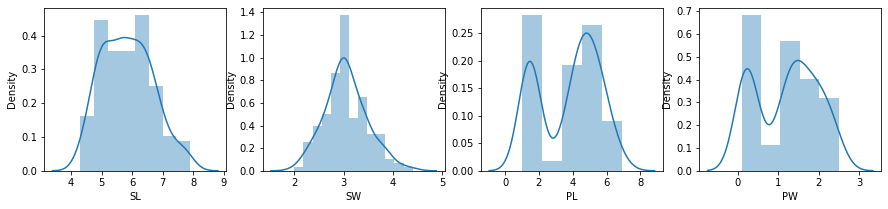

In [13]:
# to show the distribution of each column
fig, axes = plt.subplots(1,4, figsize=(15, 3))
columns = ['SL','SW','PL','PW']
i = 0
for column in columns:
    sns.distplot(df[column],ax = axes[i])
    i +=1


**All columns are normally distributed**

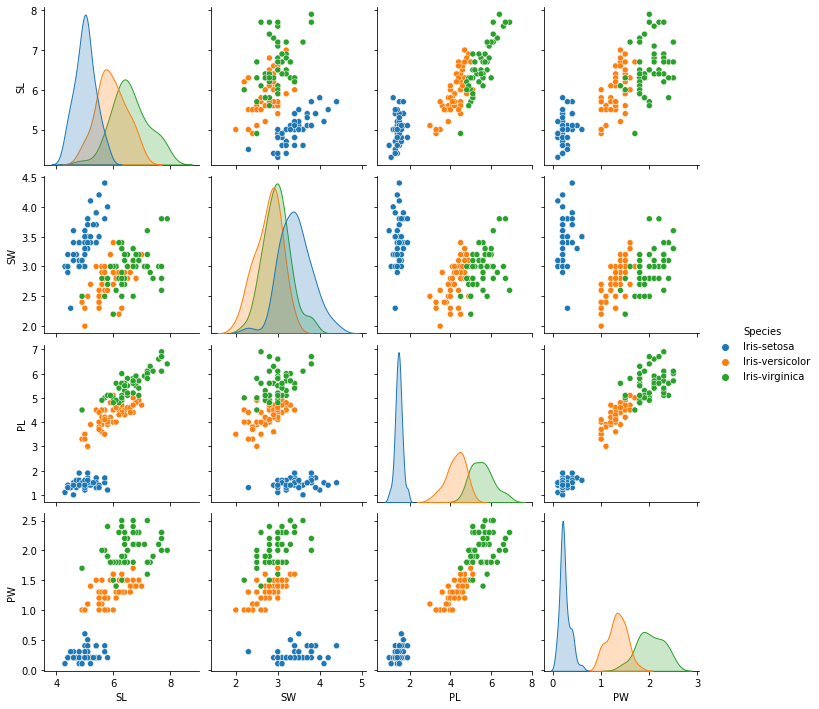

In [14]:
# to see the relationships between variables within a dataset. 
sns.pairplot(df,hue='Species')

### Preparing data

In [15]:
# variable X contian all columns except the target label
X = df.iloc[:,0:-1]

### Finding the optimal number of clusters

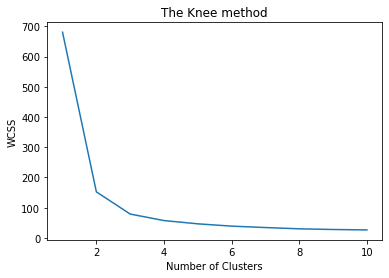

In [16]:
# import library kmeans 
from sklearn.cluster import KMeans

# list for each number of clusuters, we append the sum of squared distance between each point and the centroid in a cluster. 
wcss = [] 
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# ploting the elbow
plt.plot(range(1,11),wcss)
plt.title('The Knee method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

**The optimal number of clusters is 3 clusters**

### Model

In [17]:
# create kmeans classifier with 3 clusters
model = KMeans(n_clusters=3)
model.fit(X)

KMeans(n_clusters=3)

In [18]:
# predict the 3 classes 
y_predict = model.predict(X)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [20]:
# actual clusters
df.Species.values

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

### Visualizing Clusters

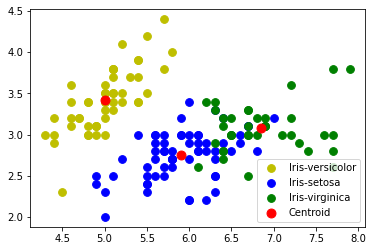

In [19]:
# visual clusters
plt.scatter(x=X['SL'][y_predict == 0],y=X['SW'][y_predict == 0],c = 'y', label = 'Iris-setosa',s=60)
plt.scatter(x=X['SL'][y_predict == 1],y=X['SW'][y_predict == 1],c = 'b', label = 'Iris-versicolor',s=60)
plt.scatter(x=X['SL'][y_predict == 2],y=X['SW'][y_predict == 2],c = 'g', label = 'Iris-virginica',s=60)
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c='r',s=80, label='Centroid')
plt.legend()
plt.show()